#### Includes

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np
from matplotlib import pyplot as plt
import mlflow
import pytorch_lightning as pl
from pytorch_lightning.utilities.cloud_io import load as pl_load
import torch
import sys
import pandas as pd
sys.path.insert(0, '../')

In [37]:
from src.rot_utils import *
from src.steered_cnn import SteerableKernelBase

## Spatial Homogeneity

In [51]:
base = SteerableKernelBase.create_from_rk(4, max_k=5)
K1 = torch.ones((1,1,5,5))
W = base.approximate_weights(K1)

In [52]:
pd.DataFrame({'label': base.kernels_label, 'weight': W[0,0]})

,label,weight
0,k0r0,25.212845
1,k0r1,-107.286812
2,k0r2,101.932335
3,k0r3,-19.541313
4,k1r1r,-49.464695
5,k1r2r,24.340584
6,k1r3r,-47.910381
7,k2r1r,151.446533
8,k2r2r,-150.599579
9,k2r3r,-35.060406


/home/gaby/.conda/envs/nnet/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


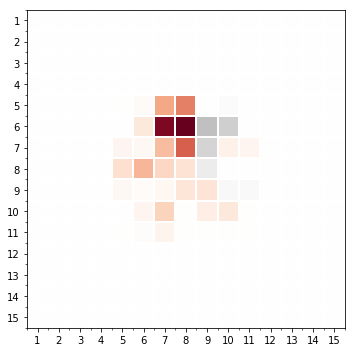

In [53]:
h, w = 15, 15
I = torch.zeros((1,1,h,w))
I[0,0,h//2,w//2] = 1
W1 = torch.ones(W.shape)
plot_filter(base.conv2d(I, W1)[0,0])

In [54]:
O = base.conv2d(I, W1)[0,0]
O.max()

tensor(5.8699)

IndexError: index 1 is out of bounds for dimension 1 with size 1

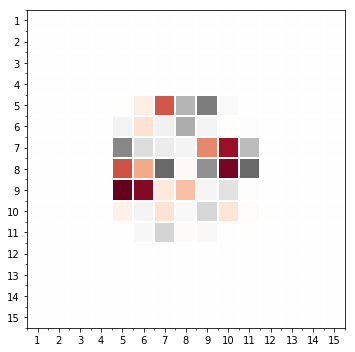

In [55]:
for i in range(6):
    plot_filter(base.conv2d(I, W)[0,i])